In [3]:
import pandas as pd
df = pd.read_csv("../data/clean_data.csv")


In [4]:
X = df.drop(columns=['Depression'])
y = df['Depression']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [5]:
y.value_counts(normalize=True)

Depression
1    0.585539
0    0.414461
Name: proportion, dtype: float64

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

numeric_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Study Hours', 'Financial Stress']
categorical_cols = ['Gender', 'City', 'Degree', 'Dietary Habits', 'Sleep Duration']

preprocessor_lr = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipe_lr = Pipeline([
    ('preprocess', preprocessor_lr),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

preprocessor_dt = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
])

pipe_dt = Pipeline([
    ('preprocess', preprocessor_dt),
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipe_dt.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

preprocessor_rf = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
])

pipe_rf = Pipeline([
    ('preprocess', preprocessor_rf),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

pipe_rf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor_svm = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipe_svm = Pipeline([
    ('preprocess', preprocessor_svm),
    ('smote', SMOTE(random_state=42)),
    ('clf', SVC(probability=True, random_state=42))
])

pipe_svm.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

preprocessor_gb = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
])

pipe_gb = Pipeline([
    ('preprocess', preprocessor_gb),
    ('smote', SMOTE(random_state=42)),
    ('clf', GradientBoostingClassifier(random_state=42))
])

pipe_gb.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
from xgboost import XGBClassifier

pipe_xgb = Pipeline([
    ('preprocess', preprocessor_gb),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        learning_rate=0.05,
        n_estimators=200,
        max_depth=4
    ))
])

pipe_xgb.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': pipe_lr,
    'Decision Tree': pipe_dt,
    'Random Forest': pipe_rf,
    'SVM': pipe_svm,
    'Gradient Boosting': pipe_gb,
    'XGBoost':pipe_xgb
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

import pandas as pd
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
5,XGBoost,0.795768,0.813809,0.844458,0.828850,0.865962
4,Gradient Boosting,0.793975,0.815876,0.837110,0.826356,0.866213
2,Random Forest,0.789851,0.809397,0.838641,0.823759,0.858043
0,Logistic Regression,0.788237,0.837051,0.792713,0.814279,0.864011
3,SVM,0.787699,0.825313,0.808634,0.816888,0.855323
1,Decision Tree,0.698942,0.741847,0.745254,0.743547,0.689373


In [14]:
y_test.value_counts(normalize=True)

Depression
1    0.58562
0    0.41438
Name: proportion, dtype: float64

C:\Users\nakul\AppData\Local\Temp\ipykernel_19324\3829035621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')


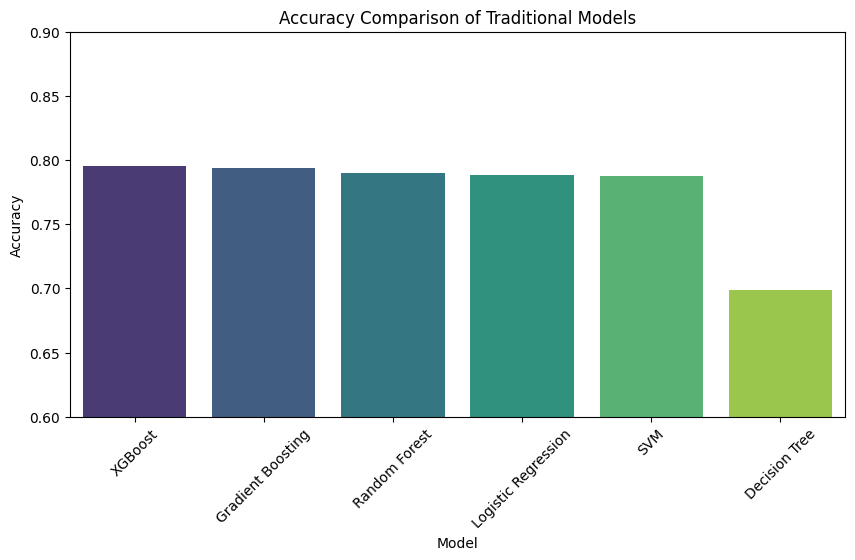

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title("Accuracy Comparison of Traditional Models")
plt.ylim(0.6, 0.9)
plt.xticks(rotation=45)
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__max_depth': [3, 4, 5],
    'clf__subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(
    estimator=pipe_gb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best Accuracy:", grid_search.best_score_)
print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Accuracy: 0.8011656579242322
Best Params: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'clf__subsample': 1.0}


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

best_pipe_gb = Pipeline([
    ('preprocess', preprocessor_gb),
    ('smote', SMOTE(random_state=42)),
    ('clf', GradientBoostingClassifier(
        learning_rate=0.05,
        max_depth=3,
        n_estimators=300,
        subsample=0.8,
        random_state=42
    ))
])
best_pipe_gb.fit(X_train, y_train)
y_pred = best_pipe_gb.predict(X_test)
y_proba = best_pipe_gb.predict_proba(X_test)[:, 1]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.7912856374394835
Precision: 0.8114997036158862
Recall: 0.8383343539497856
F1: 0.8246987951807229
ROC-AUC: 0.8656148885107912


In [16]:
param_grid_xgb = {
    'clf__n_estimators': [100, 200, 300],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__max_depth': [3, 4, 5],
    'clf__subsample': [0.7, 0.8, 1.0],
    'clf__colsample_bytree': [0.7, 0.8, 1.0]
}
from sklearn.model_selection import GridSearchCV

grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train, y_train)

print("Best Accuracy:", grid_xgb.best_score_)
print("Best Params:", grid_xgb.best_params_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Accuracy: 0.8008518269446313
Best Params: {'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'clf__subsample': 0.7}


In [17]:
best_xgb = grid_xgb.best_estimator_

y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.795230410615026
Precision: 0.8134592680047226
Recall: 0.8438456827924066
F1-Score: 0.8283739104298167
ROC-AUC: 0.8670047773329344


In [18]:
param_grid_rf = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 5, 10, 15],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2']
}
from sklearn.model_selection import GridSearchCV

grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, y_train)

print("Best Accuracy:", grid_rf.best_score_)
print("Best Params:", grid_rf.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Accuracy: 0.7972651871777627
Best Params: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = grid_rf.predict(X_test)

y_proba = grid_rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("Accuracy:", round(acc, 3))
print("Precision:", round(prec, 3))
print("Recall:", round(rec, 3))
print("F1-Score:", round(f1, 3))
print("ROC-AUC:", round(roc, 3))


Accuracy: 0.79
Precision: 0.811
Recall: 0.836
F1-Score: 0.823
ROC-AUC: 0.862


In [21]:
from autogluon.tabular import TabularPredictor

import pandas as pd
df = pd.read_csv("../data/clean_data.csv")

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Depression'], random_state=42)

label = 'Depression'

predictor = TabularPredictor(label=label, eval_metric='accuracy', path='./autogluon_models/').fit(
    train_data=train_df,
    time_limit=600, 
    presets='best_quality'  
)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       5.61 GB / 15.68 GB (35.8%)
Disk Space Avail:   100.26 GB / 475.80 GB (21.1%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is us

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = predictor.predict(test_df)
y_proba = predictor.predict_proba(test_df)[1]  # Probability for class '1' (Depression)

y_test = test_df['Depression']

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8454366146673838
Precision: 0.8520796719390744
Recall: 0.8906919779546846
F1-Score: 0.8709580838323353
ROC-AUC: 0.9205498450791667


In [23]:
leaderboard = predictor.leaderboard(test_df, silent=True)
leaderboard


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost_r177_BAG_L1,0.845616,0.851289,accuracy,0.275069,0.061713,43.542790,0.275069,0.061713,43.542790,1,True,12
1,WeightedEnsemble_L2,0.845437,0.852096,accuracy,0.099267,0.085553,64.713833,0.000000,0.000000,0.653001,2,True,14
2,CatBoost_BAG_L1,0.845437,0.852096,accuracy,0.099267,0.085553,64.060832,0.099267,0.085553,64.060832,1,True,5
3,XGBoost_BAG_L1,0.845437,0.848330,accuracy,0.759918,0.341102,6.545444,0.759918,0.341102,6.545444,1,True,9
4,NeuralNetTorch_r79_BAG_L1,0.844899,0.849899,accuracy,0.952509,0.364795,70.758113,0.952509,0.364795,70.758113,1,True,13
5,ExtraTreesGini_BAG_L1,0.843823,0.840305,accuracy,0.697337,1.325233,1.758847,0.697337,1.325233,1.758847,1,True,6
6,NeuralNetFastAI_BAG_L1,0.843823,0.848913,accuracy,2.906332,0.632744,62.873381,2.906332,0.632744,62.873381,1,True,8
7,LightGBM_BAG_L1,0.843106,0.849182,accuracy,0.788954,0.482362,3.991174,0.788954,0.482362,3.991174,1,True,2
8,NeuralNetTorch_BAG_L1,0.842568,0.848778,accuracy,0.834135,0.276289,84.462174,0.834135,0.276289,84.462174,1,True,10
9,RandomForestGini_BAG_L1,0.842388,0.840619,accuracy,0.936386,1.308500,2.244927,0.936386,1.308500,2.244927,1,True,3
